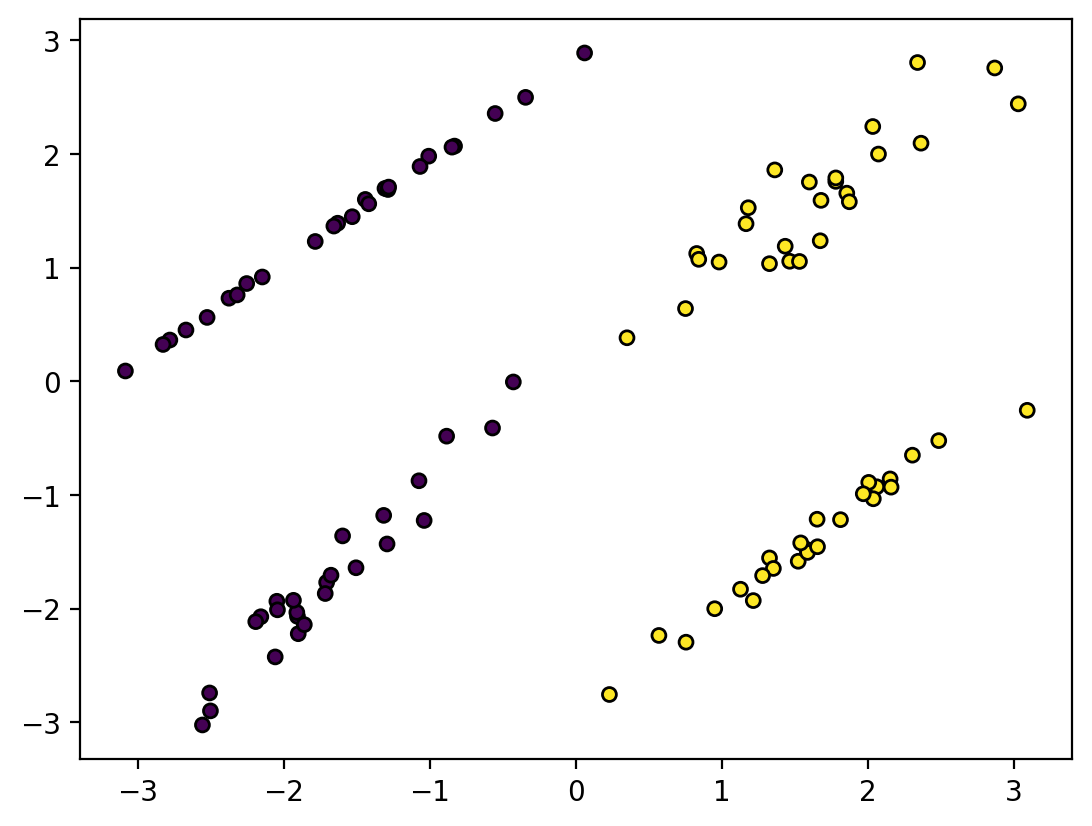

In [1]:
# Create linearly separable data in 2d

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                            n_clusters_per_class=2, class_sep=1.5, random_state=42)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [92]:
from sklearn.linear_model import LogisticRegression

# Without regularization
clf = LogisticRegression(random_state=0, penalty='none').fit(X, y)
clf.coef_, clf.intercept_

(array([[26.23339925, -5.01002931]]), array([1.74951957]))

In [72]:
# Create a surface plot of the decision boundary for any theta_0, theta_1, theta_2

def plot_decision_boundary(theta_0, theta_1, theta_2):
    x_lin = np.linspace(-4, 4, 100)
    y_lin = -(theta_0 + theta_1 * x_lin) / theta_2
    plt.plot(x_lin, y_lin, 'k--', label='Decision boundary ($\sigma(z) = 0.5$))', lw=5)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title(r'$\theta_0 = {:.2f}, \theta_1 = {:.2f}, \theta_2 = {:.2f}$'.format(theta_0, theta_1, theta_2))

    # Plot the probability of class 1 contour
    x1, x2 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    z = 1 / (1 + np.exp(-(theta_0 + theta_1 * x1 + theta_2 * x2)))
    plt.contourf(x1, x2, z, linestyles='dashed')
    plt.colorbar()

    # Plot the data
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
    plt.legend(loc='best')

In [93]:
# Create a slider widget to explore the decision boundary

from ipywidgets import interact, FloatSlider

interact(plot_decision_boundary,
            theta_0=FloatSlider(min=-2, max=3, step=0.1, value=0.1),
            theta_1=FloatSlider(min=-5, max=40, step=0.5, value=0.1),
            theta_2=FloatSlider(min=-10, max=5, step=0.1, value=0.1))




interactive(children=(FloatSlider(value=0.1, description='theta_0', max=3.0, min=-2.0), FloatSlider(value=0.1,…

<function __main__.plot_decision_boundary(theta_0, theta_1, theta_2)>

In [99]:
# Create a 3d plot of the decision boundary for any theta_0, theta_1, theta_2

from mpl_toolkits.mplot3d import Axes3D

def plot_decision_boundary_3d(theta_0, theta_1, theta_2, azim=30, elev=30):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x_lin = np.linspace(-4, 4, 100)
    y_lin = np.linspace(-4, 4, 100)
    X_g, Y_g = np.meshgrid(x_lin, y_lin)
    Z_g = -(theta_0 + theta_1 * X_g + theta_2 * Y_g)
    #ax.plot_surface(X_g, Y_g, Z_g, alpha=0.2)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_zlabel(r'$x_3$')
    ax.set_title(r'$\theta_0 = {:.2f}, \theta_1 = {:.2f}, \theta_2 = {:.2f}$'.format(theta_0, theta_1, theta_2))
    
    # Scatter plot of data (class 1 is Z = 1, class 0 is Z = 0)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], 1, marker='o', c='b', s=25, edgecolor='k')
    ax.scatter(X[y == 0, 0], X[y == 0, 1], 0, marker='o', c='y', s=25, edgecolor='k')

    # Plot the 3d sigmoid function
    x1, x2 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    z = 1 / (1 + np.exp(-(theta_0 + theta_1 * x1 + theta_2 * x2)))
    ax.plot_surface(x1, x2, z, alpha=0.2, color='green')
    
    # Rotate the plot so that the sigmoid function is visible
    ax.view_init(azim, elev)

    # Plot the decision plane
    ax.plot_surface(X_g, Y_g, Z_g, alpha=0.2, color='k')



In [100]:
# Create a slider widget to explore the decision boundary

from ipywidgets import interact, FloatSlider

interact(plot_decision_boundary_3d,
            theta_0=FloatSlider(min=-2, max=3, step=0.1, value=0.1),
            theta_1=FloatSlider(min=-5, max=40, step=0.5, value=0.1),
            theta_2=FloatSlider(min=-10, max=5, step=0.1, value=0.1),
            azim=FloatSlider(min=-180, max=180, step=1, value=30),
            elev=FloatSlider(min=-180, max=180, step=1, value=30))




interactive(children=(FloatSlider(value=0.1, description='theta_0', max=3.0, min=-2.0), FloatSlider(value=0.1,…

<function __main__.plot_decision_boundary_3d(theta_0, theta_1, theta_2, azim=30, elev=30)>

In [104]:
# Create two 3d plot any theta_0, theta_1, theta_2
# First showing the decision boundary
# Second showing the probability of class 1

from mpl_toolkits.mplot3d import Axes3D

def plot_decision_boundary_3d(theta_0, theta_1, theta_2, azim=30, elev=30):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    x_lin = np.linspace(-4, 4, 100)
    y_lin = np.linspace(-4, 4, 100)
    X_g, Y_g = np.meshgrid(x_lin, y_lin)
    Z_g = -(theta_0 + theta_1 * X_g + theta_2 * Y_g)
    #ax.plot_surface(X_g, Y_g, Z_g, alpha=0.2)
    ax1.set_xlabel(r'$x_1$')
    ax1.set_ylabel(r'$x_2$')
    ax1.set_zlabel(r'$x_3$')
    ax1.set_title(r'$\theta_0 = {:.2f}, \theta_1 = {:.2f}, \theta_2 = {:.2f}$'.format(theta_0, theta_1, theta_2))

    # Scatter plot of data (class 1 is Z = 1, class 0 is Z = 0)
    ax1.scatter(X[y == 1, 0], X[y == 1, 1], 1, marker='o', c='b', s=25, edgecolor='k')
    ax1.scatter(X[y == 0, 0], X[y == 0, 1], 0, marker='o', c='y', s=25, edgecolor='k')

    # Plot the 3d sigmoid function
    x1, x2 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    z = 1 / (1 + np.exp(-(theta_0 + theta_1 * x1 + theta_2 * x2)))

    # Plot the decision plane
    ax1.plot_surface(X_g, Y_g, Z_g, alpha=0.2, color='k')

    # Plot the probability of class 1
    ax2.plot_surface(x1, x2, z, alpha=0.2, color='black')
    ax2.scatter(X[y == 1, 0], X[y == 1, 1], 1, marker='o', c='b', s=25, edgecolor='k')
    ax2.scatter(X[y == 0, 0], X[y == 0, 1], 0, marker='o', c='y', s=25, edgecolor='k')


     # Rotate the plot so that the sigmoid function is visible
    ax1.view_init(azim, elev)
    ax2.view_init(azim, elev)


In [105]:
# Create a slider widget to explore the decision boundary

from ipywidgets import interact, FloatSlider

interact(plot_decision_boundary_3d,
            theta_0=FloatSlider(min=-2, max=3, step=0.1, value=0.1),
            theta_1=FloatSlider(min=-5, max=40, step=0.5, value=0.1),
            theta_2=FloatSlider(min=-10, max=5, step=0.1, value=0.1),
            azim=FloatSlider(min=-180, max=180, step=1, value=30),
            elev=FloatSlider(min=-180, max=180, step=1, value=30))




interactive(children=(FloatSlider(value=0.1, description='theta_0', max=3.0, min=-2.0), FloatSlider(value=0.1,…

<function __main__.plot_decision_boundary_3d(theta_0, theta_1, theta_2, azim=30, elev=30)>